In [3]:
from itertools import combinations
import networkx as nx
from networkx.readwrite import json_graph
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json

In [121]:
techlist=["javascript","sql", 'java', 'c#', 'php', 'c++', 'c', 'node.js', 'angularjs', 'ruby', 'rails', 'python',
          'delphi', 'typescript', 'bash', 'groovy', 'powershell', 'html', 'css', 'django','postgresql', 'jquery', 'ios', 'git', 
          'mysql', '.net', 'arrays', 'swift', 'objective-c', 'string', 'json', 'sql server', 'linux', 'regex', 'asp.net', 
         'react', 'spark', 'cassandra', 'raspberry pi', 'wordpress', 'mongodb', 'redis', 'vba', 'hadoop', 'clojure',"visual basic",
          'f#', 'sharepoint', 'rust', 'scala', 'cordova', 'perl', 'salesforce', 'matlab', 'dart', 'coffeescript',
         'haskell', 'windows phone', 'aws', 'gae', 'azure', 'lamp', "lua", "drupal", "elixir", "fortran", "erlang", "pl/sql", 
         "elasticsearch", "coldfusion", "kotlin", "smalltalk", "abap", "elm", "r", "cloud", "sas", "d3", "spss",
         "excel", "tableau", "pig", "mapreduce", "hive", "shark", "oozie", "zookeeper", "flume", "mahout", "android"]

In [61]:

#generate techlist for each posting
post_techlist=[]
#for i in range(1000):
for tech in techlist:    
    if tech in df_to["post_text"][7].split(","):
        post_techlist.append(tech)

In [126]:
## Top Skills for a specific city ##
skillctdict={}
for tech in techlist:
    acount=%sql SELECT Count(*) FROM ALLPOST WHERE location = "Toronto_ON" AND (post_text LIKE "%,$tech,%" OR post_text LIKE "$tech,%" OR post_text LIKE "%,$tech")
    citycount=%sql SELECT Count(*) FROM ALLPOST WHERE location = "Toronto_ON"
    if citycount[0][0] != 0:
        skillctdict[tech]=acount[0][0]/citycount[0][0]

In [ ]:
def skillchart(dic, title_city):
    df=pd.DataFrame.from_dict(dic, orient='index', dtype=None)
    df.columns=['Percentage']
    df.sort_values(by='Percentage', ascending=False, inplace=True)
    tofig=df[0:20].plot.bar(figsize=(15,8), fontsize=16, color='#A3E4D7')
    tofig.set_title('Key Skills in ' + title_city, fontsize=16, fontweight='bold')

In [11]:
df_to = pd.read_csv("D:\monster_scrapingdata\softdev_Toronto_ON_20170116.csv", sep='\t', header=0, index_col=0)

In [138]:
%sql DROP TABLE IF EXISTS TOPOST
%sql CREATE TABLE TOPOST (keyword varchar, location varchar, link varchar, post_text varchar)

[]

In [139]:
%sql DROP TABLE IF EXISTS df_to
%sql PERSIST df_to
%sql INSERT INTO TOPOST SELECT keyword, location, link, post_text FROM df_to 

[]

In [142]:
skillctdict={}
for tech in techlist:
    acount=%sql SELECT Count(*) FROM TOPOST WHERE location = "Toronto_ON" AND (post_text LIKE "%,$tech,%" OR post_text LIKE "$tech,%" OR post_text LIKE "%,$tech")
    citycount=%sql SELECT Count(*) FROM TOPOST WHERE location = "Toronto_ON"
    if citycount[0][0] != 0:
        skillctdict[tech]=acount[0][0]/citycount[0][0]

In [145]:
postings=[]
postings = [(k, skillctdict[k]) for k in sorted(skillctdict, key=skillctdict.get, reverse=True)]

In [56]:
##build networkx graph
def skill_graph(df):
    graph=nx.Graph()
    graph.clear()
    for i in range(len(df)):
        post_techlist=[]
        for tech in techlist:    
            if tech in df["post_text"][i].split(","):
                post_techlist.append(tech)
        for comb in combinations(post_techlist, 2):
            if graph.has_edge(comb[0],comb[1]):
                graph[comb[0]][comb[1]]['weight'] += 1
            else:
                graph.add_edge(comb[0], comb[1], weight=1)
    return graph

In [98]:
graph.add_nodes_from(techlist)

In [103]:
edge=sorted(map(lambda x: (x, graph[x[0]][x[1]]['weight']), graph.edges()), key = lambda x: x[1], reverse=True)

In [104]:
nodelist=sorted(list(nx.link_analysis.pagerank(graph, weight='weight').items()), key = lambda x: x[1], reverse=True)

In [162]:
majornodelist=[x[0] for x in postings]

In [159]:
nodesize=[x[1]*5000 for x in postings]

In [108]:
edgelist=[x[0] for x in edge][:100]
edgecolor=[(255-x[1]*255/160) for x in edge][:100]

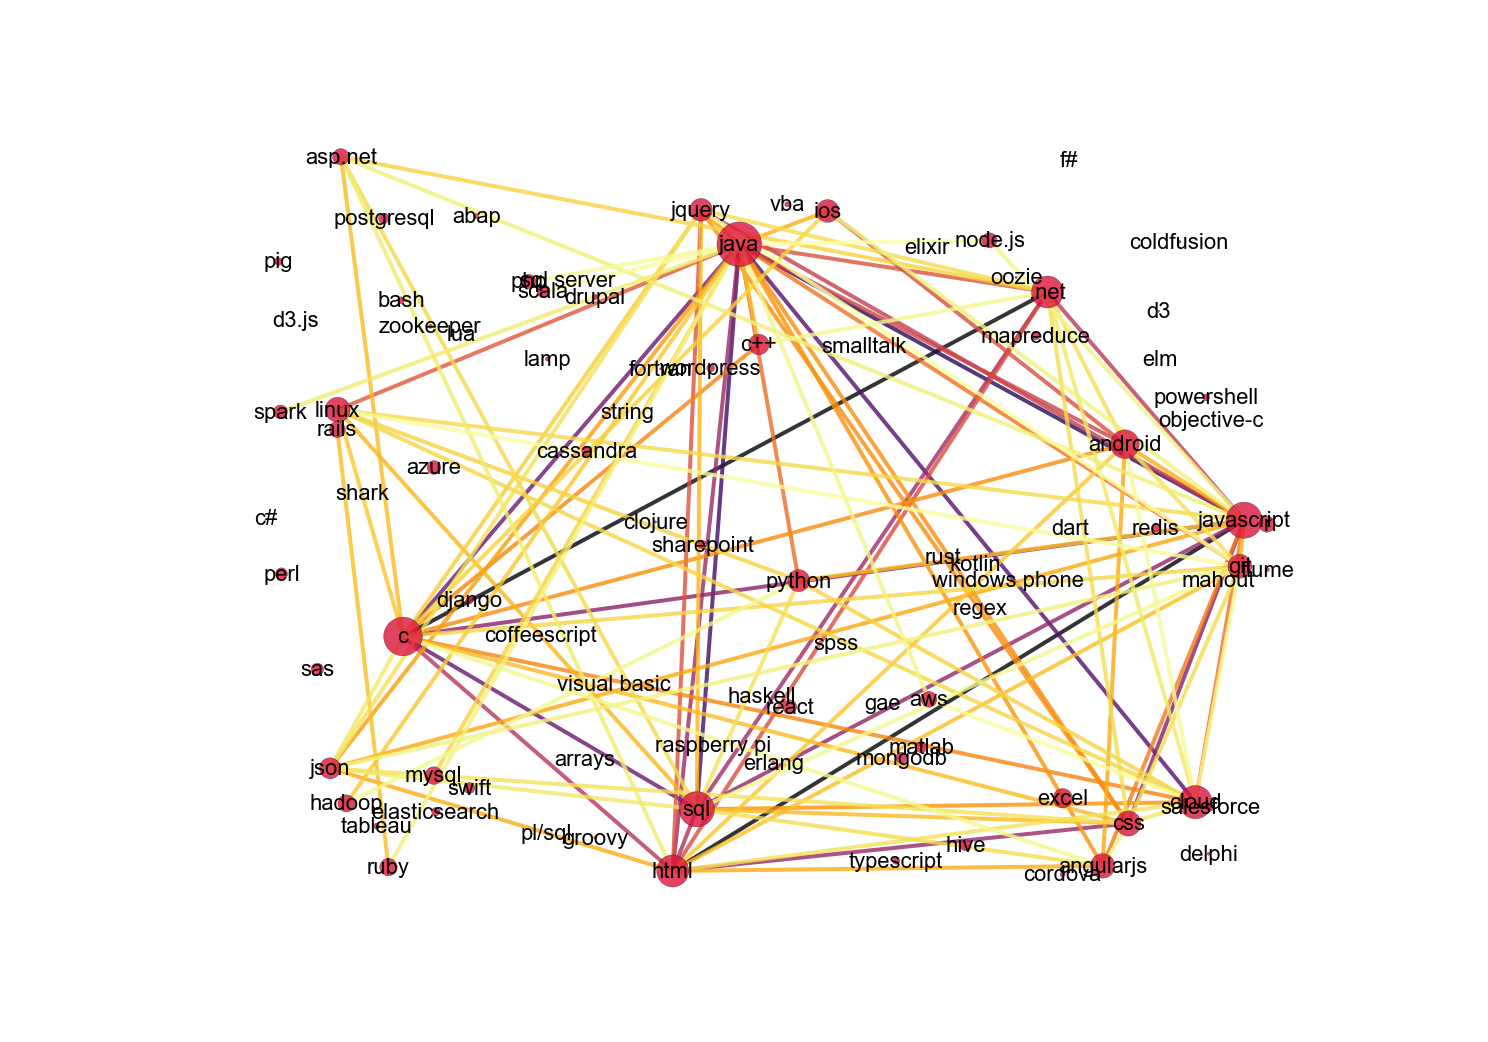

In [163]:
plt.figure(figsize=(20,14))
#G = nx.cycle_graph(80)
pos = nx.random_layout(graph)
nx.draw(graph, pos, with_labels=True, nodelist=majornodelist, node_size=nodesize, node_color="#DC143C",
        edgelist=edgelist, edge_color=edgecolor, edge_cmap=plt.cm.inferno, font_size=22, font_color="k",
        width=4.0, alpha=0.8, font_family="sans-serif")

In [67]:
## Data writing for ChordChart
# removed huston, texas
location_list=["Toronto_ON", "Montreal_QC", "Vancouver_BC", "Waterloo_ON", "New-York_NY", "Boston_MA", "Washington_DC", 
               "Seattle_WA", "San-Francisco_CA", "Austin_TX", "San-Jose_CA", "Raleigh_NC", "Portland_OR", 
               "Atlanta_GA", "San-Diego_CA", "Denver_CO", "Minneapolis_MN", "Saint-Louis_MO"]

all_records = []
for loc in location_list:
    df_loc = pd.read_csv("D:\monster_scrapingdata\softdev_" + loc + "_20170116.csv", sep='\t', header=0, index_col=0)
    loc_graph = skill_graph(df_loc)
    loc_records = [(loc, skill1, skill2, loc_graph[skill1][skill2]["weight"]) for (skill1, skill2) in loc_graph.edges()]
    all_records.extend(loc_records)
    print("Done: " + loc)

df_csv = pd.DataFrame(all_records, columns=["Location", "Skill1", "Skill2", "Job Postings"])
df_csv.to_csv(r"D:\Data Incubator\capstone_project\weight\skills.csv", sep=',', index=False, encoding='utf-8')

Done: Toronto_ON
Done: Montreal_QC
Done: Vancouver_BC
Done: Waterloo_ON
Done: New-York_NY
Done: Boston_MA
Done: Washington_DC
Done: Seattle_WA
Done: San-Francisco_CA
Done: Austin_TX
Done: San-Jose_CA
Done: Raleigh_NC
Done: Portland_OR
Done: Atlanta_GA
Done: San-Diego_CA
Done: Denver_CO
Done: Minneapolis_MN
Done: Saint-Louis_MO
